In [1]:
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


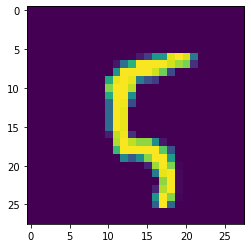

<Figure size 432x288 with 0 Axes>

In [4]:
plt.imshow(x_train[100])
print(y_train[100])
#Actually displaying the plot if you are not in interactive mode
plt.show()
#Saving plot
plt.savefig("fig.png")

In [5]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [12]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
y_train.shape

(60000, 10)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

In [19]:
epochs = 10
batch_size = 32
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0]//batch_size
)


Epoch 1/10
   1/1875 [..............................] - ETA: 3:47 - loss: 0.2084 - accuracy: 0.9688

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 211s 112ms/step - loss: 0.2113 - accuracy: 0.9376 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 2/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.1142 - accuracy: 0.9667 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.0321 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.0782 - accuracy: 0.9774 - val_loss: 0.0251 - val_accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0702 - accuracy: 0.9798 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0670 - accuracy: 0.9804 - val_loss: 0.0192 - val_accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0619 - accuracy: 0.9822 - val_loss: 0.022

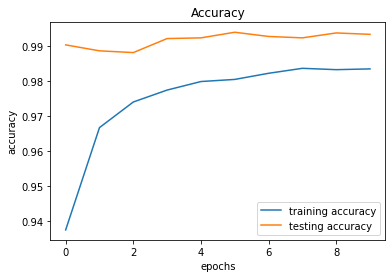

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

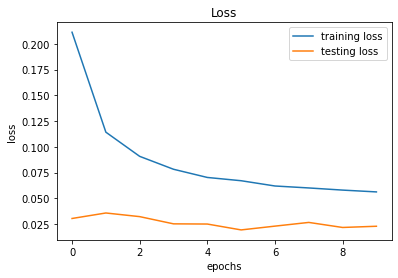

In [22]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()